<a href="https://colab.research.google.com/github/Icrz11/CS114.K21/blob/master/Time_of_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score


Thêm vào các thư viện cần thiết



In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data - Thoigiangchaycuamaytinh/data.csv')


Đọc file CSV từ drive thông qua thư viện Pandas


In [0]:
df.head()


,Data,Time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560


Nhìn sơ qua 5 điểm dữ liệu đầu tiên


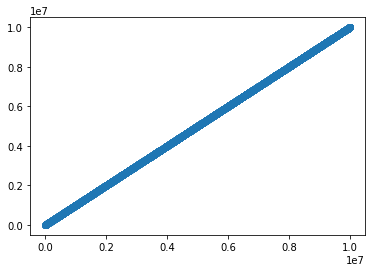

In [0]:
a = np.array (df['Data'], dtype=np.float64)
b = np.array (df['Data'],  dtype=np.float64)
plt.scatter(a,b)
plt.show ()

Biểu đồ biểu diễn quan hệ giữa cột Data và cột Time

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    5211 non-null   int64  
 1   Time    5211 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 81.5 KB


Thông tin về Dataset, ta có 5211 điểm dữ liệu với 2 đặc trưng đó là Data, và Time


In [0]:
Y = np.array (df['Time'], dtype=np.float64)
df.drop(['Time'], axis = 1)

,Data
0,4032139
1,2055486
2,5626651
3,42065
4,6297788
...,...
5206,6600098
5207,5339132
5208,4794647
5209,4440131


Ta sẽ lấy cột Time ra để lưu vào biến Y, yêu cầu của bài toán là khi ta có 1 dữ liệu đầu vào là Data của chương trình thì ta sẽ dự đoán được đầu ra là thời gian để chạy chương trình đó

In [0]:
tmp = df['Data']
tmp = np.array(tmp, dtype=np.float64)
print (tmp)
print (type(tmp))

[4032139. 2055486. 5626651. ... 4794647. 4440131. 2033708.]
<class 'numpy.ndarray'>


Tạo ra 1 biến tạm có tên là tmp để lưu trữ các giá trị của cột Data theo kiểu numpy-array

In [0]:
Square = (tmp**2)
nlog = [i*math.log(i) for i in tmp]
sqrt = [math.sqrt(i) for i in tmp]


Tính toán 3 biến Square(bình phương của cột Data), nlog (nlog(n) của cột Data) và sqrt(căng bậc 2 của cột Data)


In [0]:
print (Square[1])
print (len(Square))
print (nlog[1])
print (len(nlog))
print (sqrt[1])
print (len(sqrt))

[1.62581449e+13 4.22502270e+12 3.16592015e+13 ... 2.29886399e+13
 1.97147633e+13 4.13596823e+12]
5211
[61328058.2546281, 29878591.513807487, 87455177.01354423, 447864.8485751654, 98596336.38881014, 141927820.65089467, 46445454.69693631, 35428700.400218256, 7393539.599020434, 144331197.33467397, 95295251.5287909, 113515911.32178453, 56912432.27347632, 127231826.96391574, 62842900.519333534, 120083262.72349305, 144891703.51076797, 44547811.510359265, 44057846.21770673, 28107533.145369947, 129091201.21797512, 65133785.2221251, 11979425.28362418, 111467300.32204898, 19511151.359301344, 130181910.08932428, 19980233.65621123, 64607237.94181051, 123005779.3354741, 125455183.71336047, 90495854.19019827, 101186134.94342998, 40101617.76851542, 155099357.72060448, 16455141.69827093, 97418060.92375785, 57596170.23729787, 81777848.86639552, 107660873.70241402, 117159584.252443, 6549474.937083427, 62094571.861978, 67498699.11402644, 49010374.99760351, 104039973.03345332, 73292861.48864792, 153441589

Kiểm tra thử giá trị của 3 biến Square, nlog, sqrt cũng như độ dài của chúng


In [0]:
df['Square'] = Square
df['nlogn'] = nlog
df['Sqrt'] = sqrt

Tạo ra 3 cột mới trong bảng dữ liệu của mình để lưu trữ 3 bộ giá trị nằm trong 3 biến Square, nlog, và sqrt

In [0]:
df.head()

,Data,Time,Square,nlogn,Sqrt
0,4032139,1.200580,1.625814e+13,6.132806e+07,2008.018675
1,2055486,0.509774,4.225023e+12,2.987859e+07,1433.696621
2,5626651,1.476080,3.165920e+13,8.745518e+07,2372.056281
3,42065,0.007651,1.769464e+09,4.478648e+05,205.097538
4,6297788,1.661560,3.966213e+13,9.859634e+07,2509.539400


Kiểm tra lại tập dữ liệu 1 lần nữa, hiện tại đã có tổng cộng 5 cột dữ liệu


In [0]:
df = np.array (df, dtype= np.float64)

Chuyển đổi toàn bộ Dataset của ta từ dạng bảng sang dạng mảng numpy để đưa vào model


In [0]:
print (df)

[[4.03213900e+06 1.20058000e+00 1.62581449e+13 6.13280583e+07
  2.00801868e+03]
 [2.05548600e+06 5.09774000e-01 4.22502270e+12 2.98785915e+07
  1.43369662e+03]
 [5.62665100e+06 1.47608000e+00 3.16592015e+13 8.74551770e+07
  2.37205628e+03]
 ...
 [4.79464700e+06 1.29307000e+00 2.29886399e+13 7.37561058e+07
  2.18966824e+03]
 [4.44013100e+06 1.19653000e+00 1.97147633e+13 6.79615084e+07
  2.10716184e+03]
 [2.03370800e+06 5.17288000e-01 4.13596823e+12 2.95403638e+07
  1.42608134e+03]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.3, random_state = 30)


Cắt tập dữ liệu thành 2 phần, train và test, với 30% dữ liệu nằm trong tập test

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
model.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Khởi tạo model linear regression, đưa dữ liệu vào để train model

In [0]:
re = model.predict (X_test)

Cho model dự đoán tập dữ liệu test


In [0]:
acc = explained_variance_score(y_test, re)


In [0]:
print (acc)

0.9999988300802841


Kiểm tra độ chính xác của model 